#### **EDA_1 (First look at data) Univariate analysis**
#### Project name: **Telecom Customer Churn Prediction**
#### Author: **Fausto Pucheta Fortin**

**Overview:** \
The following notebook is meant to give a first look at the raw data and its quality. \
Univariate analysis will be employed not only to find data irregularities such as null values and outliers, but also to look and understand the data distribution. \
Each plot will be saved under the folder "../reports/figures/EDA_01" \
Findings and further steps will be discussed.

### Steps performed:
1. Data understanding:
	1. Data fields using *df.head()*
	2. Data formats using *df.info()*
	3. Tabular reports:
		1. Continuous features using function *tr_continuous_f()*
		2. Categorical features using function *tr_categorical_f()*
2. Univariate Analysis:
	1. Continuous features: 
		1. Box plots using function *grouped_boxplots()*
		2. Histograms using function *grouped_histograms()*
	2. Categorical features:
		1. Stacked bar plots using function *get_stacked_bar_plot()*
	3. Summarizing null values using stacked bar plots using function *total_null_barplot()*
3. Data Cleaning
	1. Remove unnecessary columns: CustomerID
	2. Null values imputation using median using function *impute_null_data()*. (This step also saves the imputed data frame as **"imputed_df.pkl"** under the folder "../data/processed/")

### Findings:

1. **Data Overview:** 

**Data columns:** 12 columns. \
**Categorical columns:** 'Gender', 'Subscription Type', 'Contract Length' \
**Continuous columns:** 'CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', \
'Payment Delay', 'Total Spend', 'Last Interaction' \
**Target variable:** 'Churn'. \
**Dtypes:** float64(9), object(3) \
**Memory usage:** 50.1+ MB 

2. **Data Quality** 
    1. **Outliers:** \
    No outliers were found in the dataset.

    2. **Null Values:** \
    There's a tiny proportion of missing values within the numerical features. The amount correspond to 0,00198% evenly distributed.

    3. **Class Imbalance:** \
    No class imbalance where detected, both features and lables have an almost even proportion: **44,5%** (No churn) and **55.5%** (Churn)

### Further steps:
**EDA_2 (Multivariate analysis and Feature relationships)** 

1. Feature Relationships:
	1. Bivariate analysis:
		1. Distribution of continuous features vs churn_status using histograms and box plots.
		2. Distribution of categorical features vs churn_status using bar plots.
	2. Multivariate analysis:
		1. Correlation coefficient using heatmap.
		2. Pairwise relationships between variables using pairplot().

In [2]:
import sys
sys.path.append('../src/functions')

# EDA funcitons
from tabular_report_functions import *
from plot_functions import *

# Analysis libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Null values imputation
from null_imputation import NullImputer

# Data
df = pd.read_pickle("../data/raw/customer_churn_dataset.pkl")

### Data Understanding
1.1. Data Fields

In [2]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


1.2. Data Formats

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505207 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 50.1+ MB


1.3.1. Tabular Report Continuous Features

In [4]:
tr_continuous_f(df)

,Feature,Count,Miss %,Card.,Min,1st QRT,Mean,Median,3rd QTR,Max,STD Dev
0,CustomerID,505206,0.000198,442211,1.0,63827.25,200779.451782,193039.5,321645.75,449999.0,137241.343095
1,Age,505206,0.000198,48,18.0,29.00,39.704172,40.0,49.00,65.0,12.670577
2,Tenure,505206,0.000198,60,1.0,16.00,31.350435,32.0,46.00,60.0,17.237482
3,Usage Frequency,505206,0.000198,30,1.0,8.00,15.714825,16.0,23.00,30.0,8.619323
4,Support Calls,505206,0.000198,11,0.0,1.00,3.833317,3.0,6.00,10.0,3.133603
5,Payment Delay,505206,0.000198,31,0.0,6.00,13.496843,13.0,20.00,30.0,8.451187
6,Total Spend,505206,0.000198,68363,100.0,446.00,620.072766,648.9,824.00,1000.0,245.319256
7,Last Interaction,505206,0.000198,30,1.0,7.00,14.610581,14.0,22.00,30.0,8.608286
8,Churn,505206,0.000198,2,0.0,0.00,0.555203,1.0,1.00,1.0,0.496944


1.3.2. Tabular Report Categorical Features

In [11]:
tr_categorical_f(df)

,Feature,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
Gender,Gender,505206,0.0,2,Male,280273,55.476864,[Female],224933,44.522938
Subscription Type,Subscription Type,505206,0.0,3,Standard,170630,33.774275,"[Premium, Basic]",170099,33.669169
Contract Length,Contract Length,505206,0.0,3,Annual,198608,39.312203,"[Quarterly, Monthly]",197364,39.065967


### 2. Univariate Analysis

2.1. Continuous varibales:

2.1.1. Boxplots

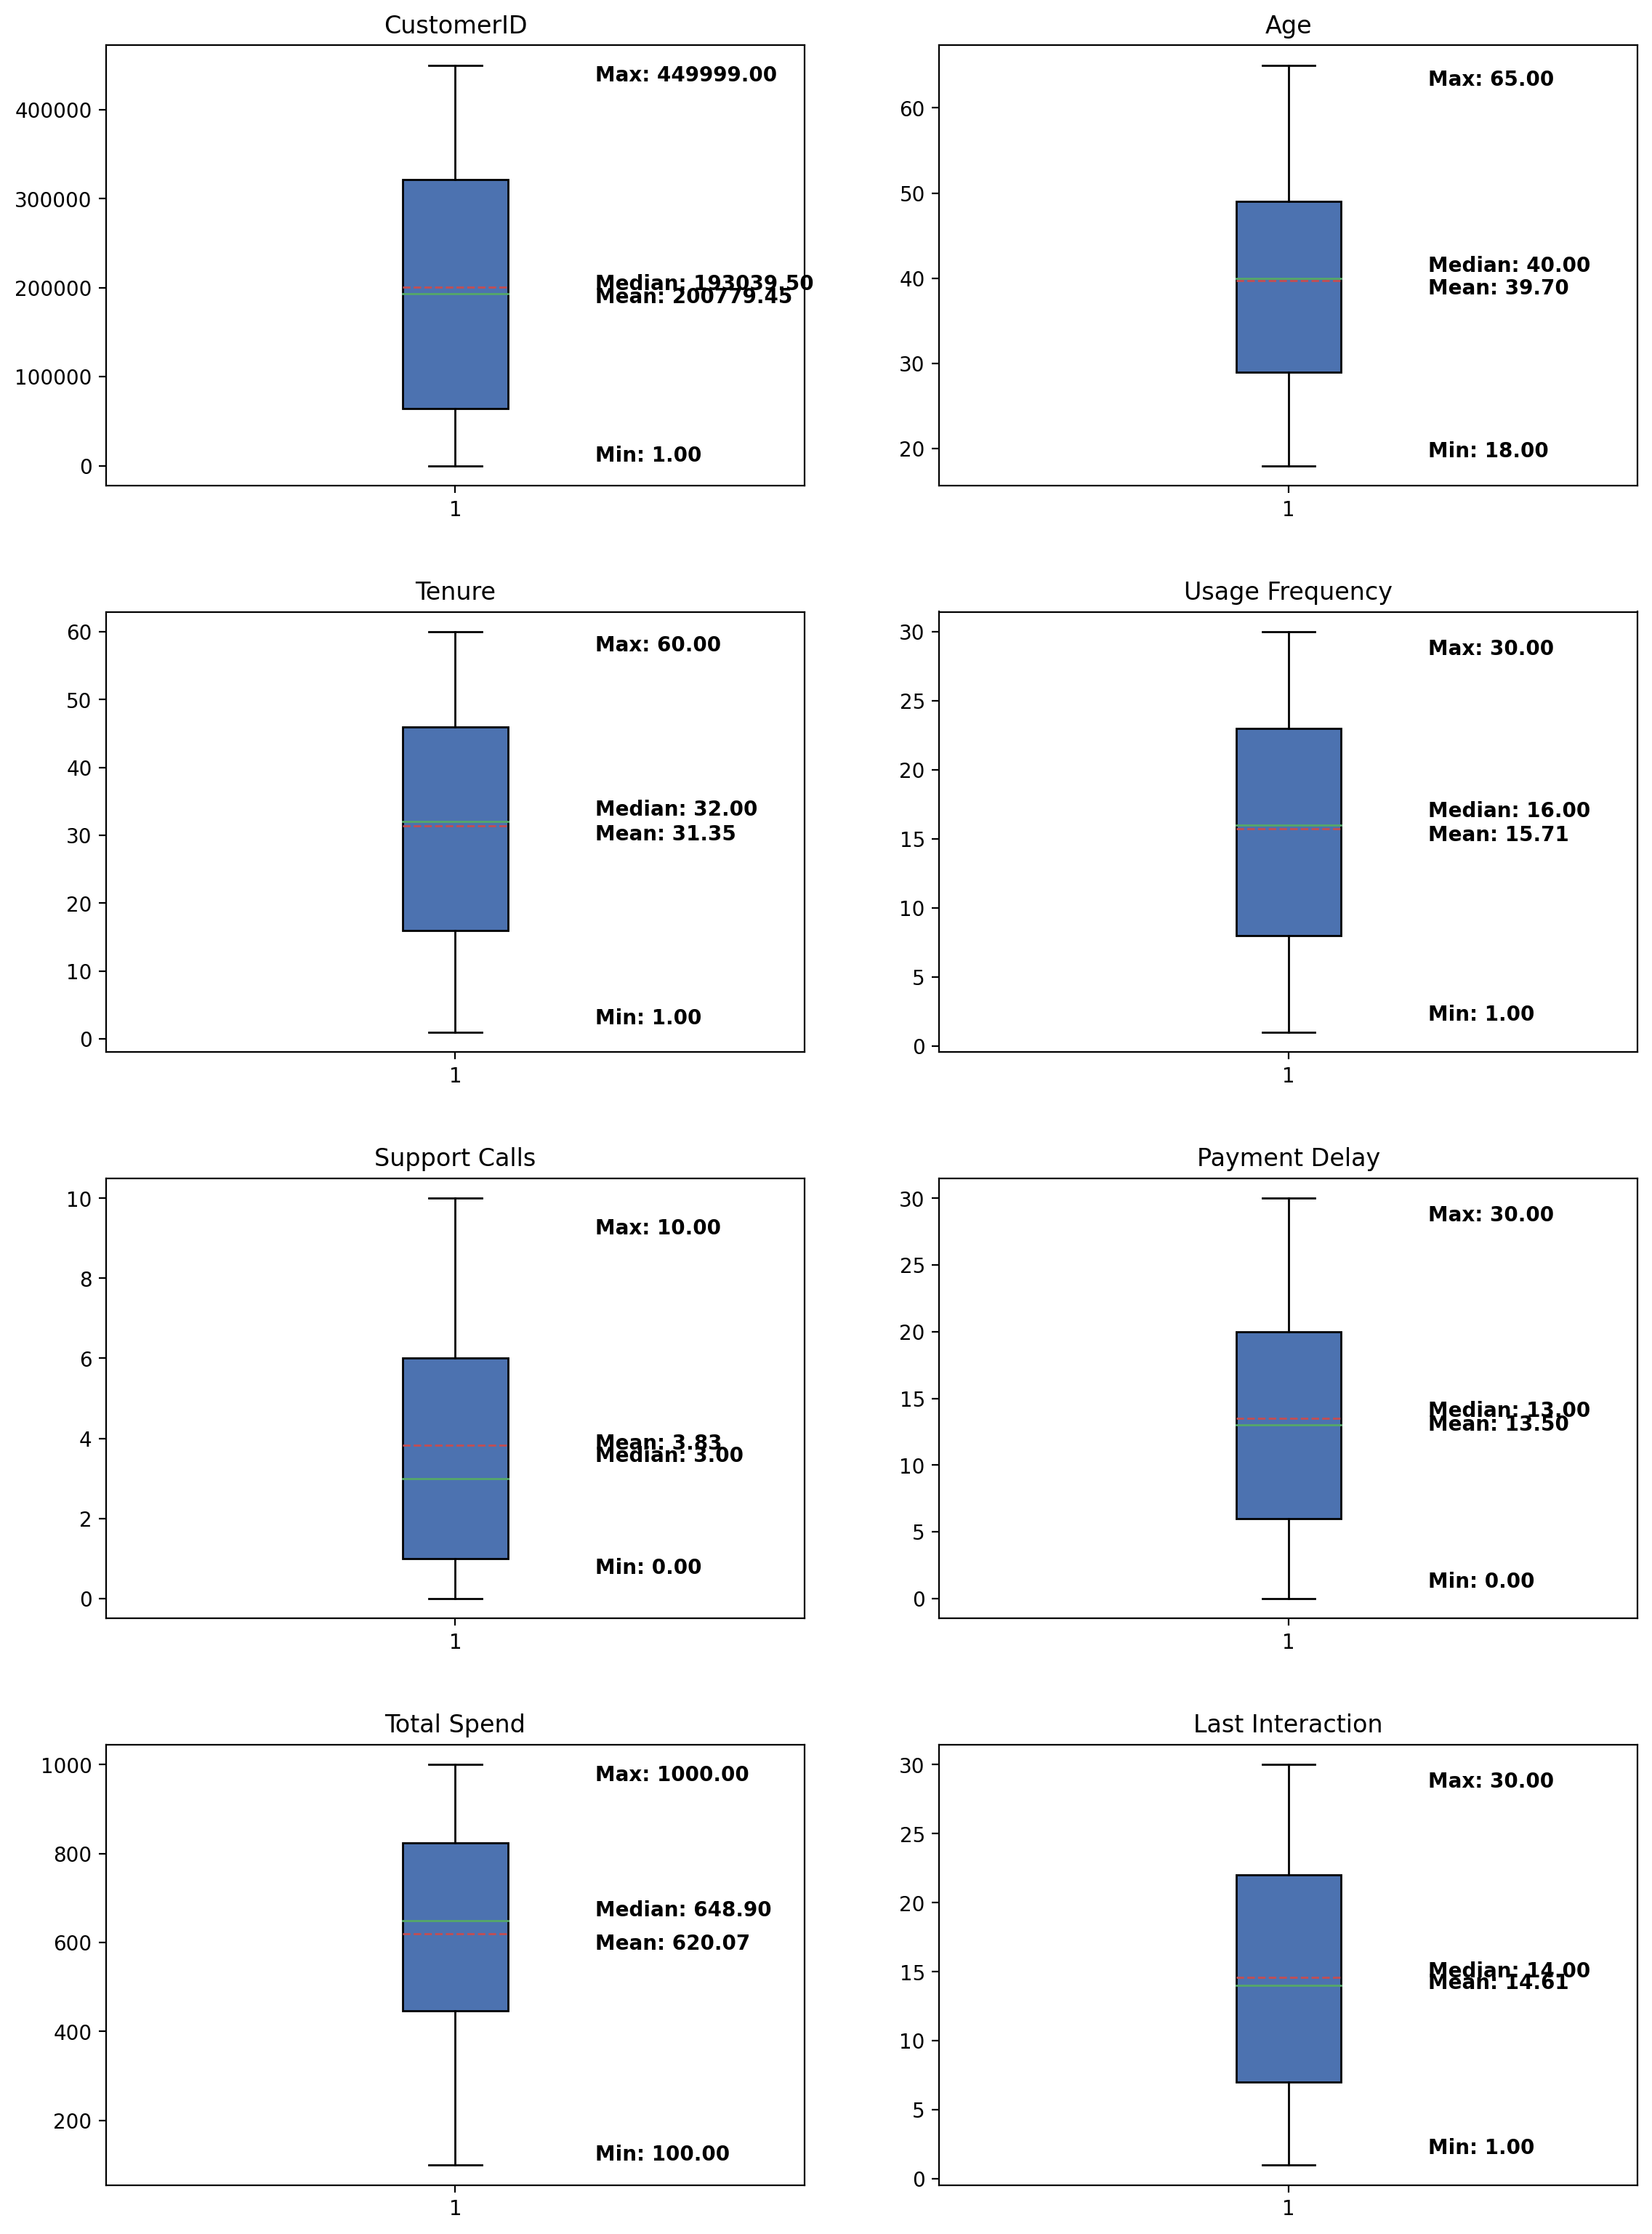

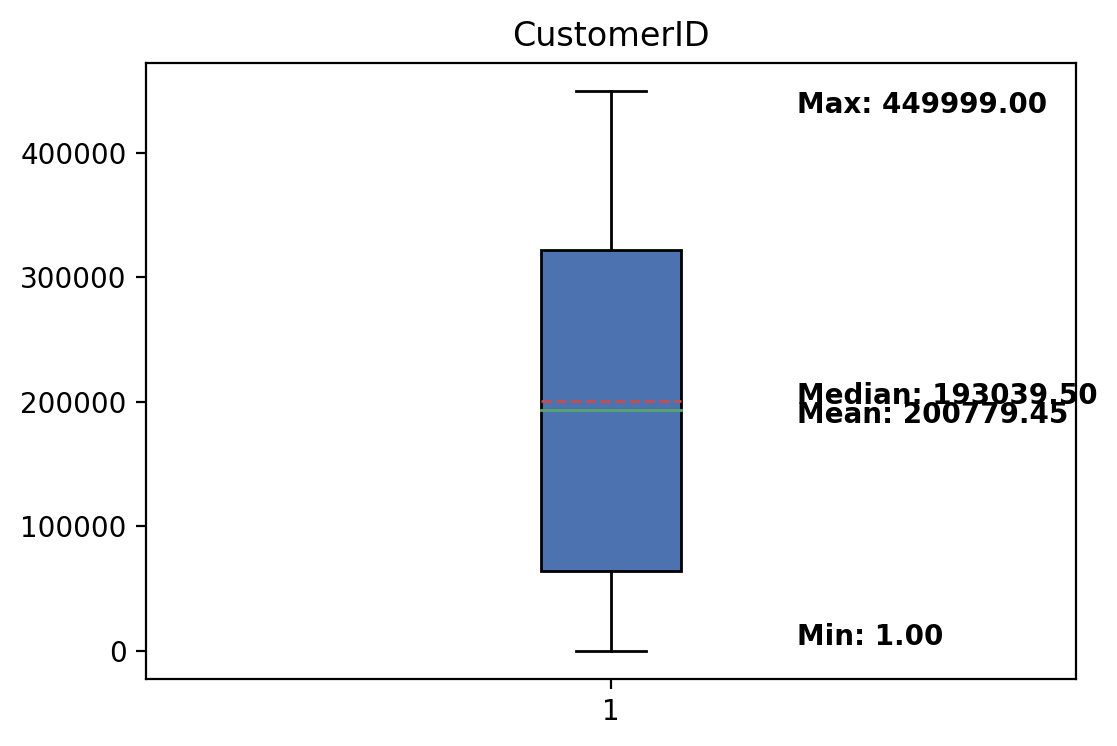

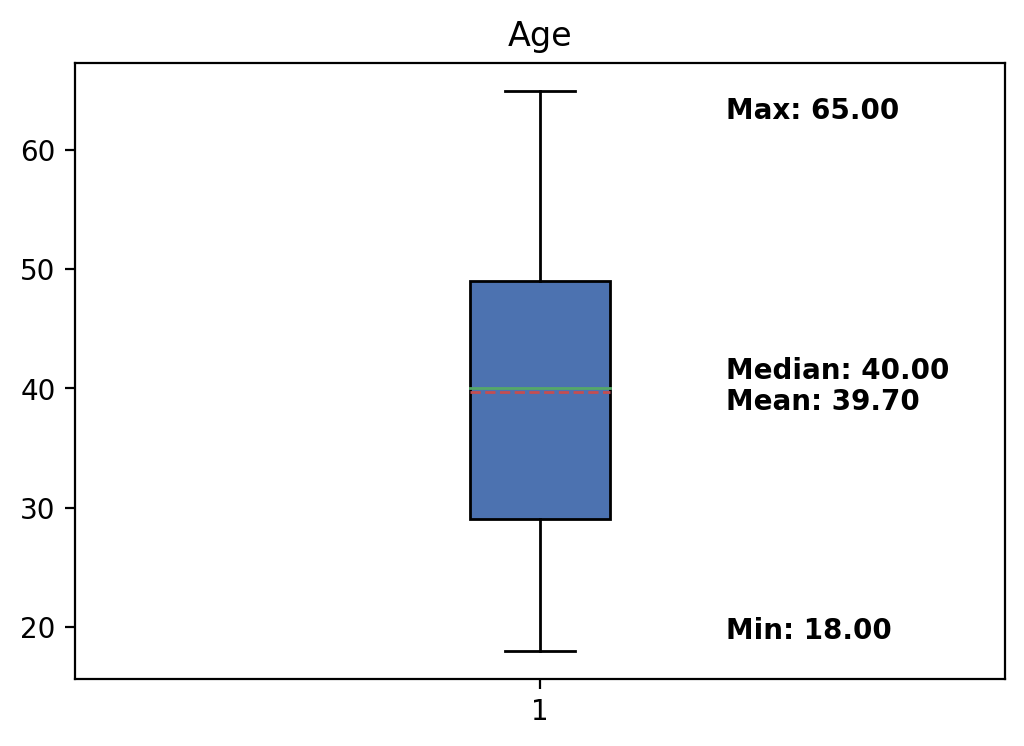

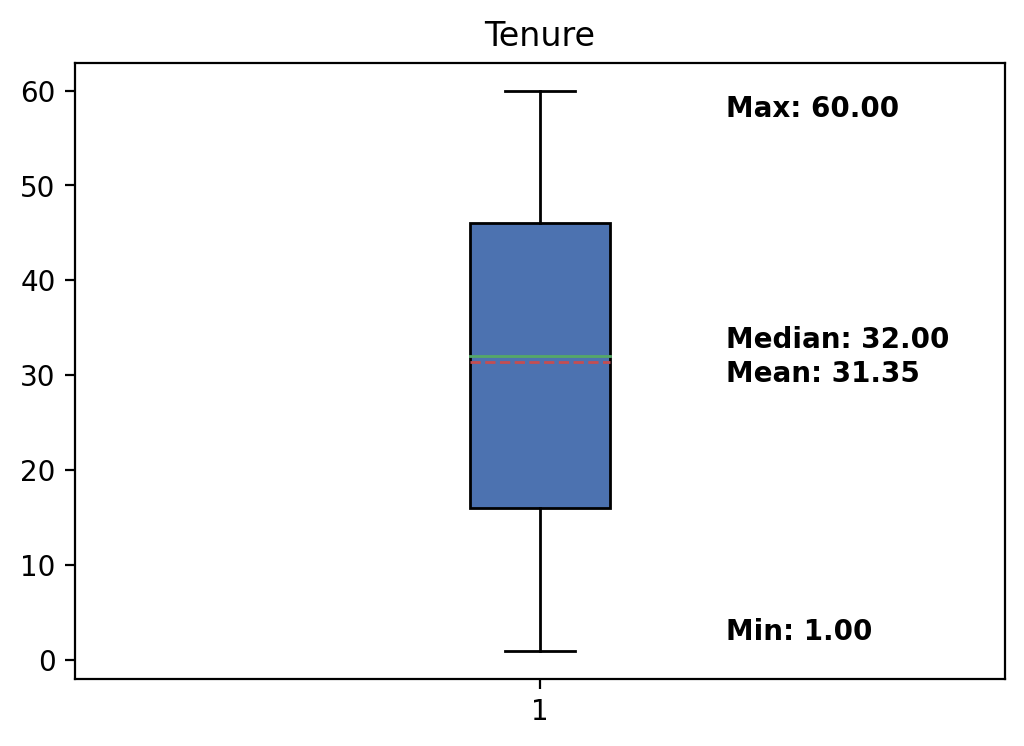

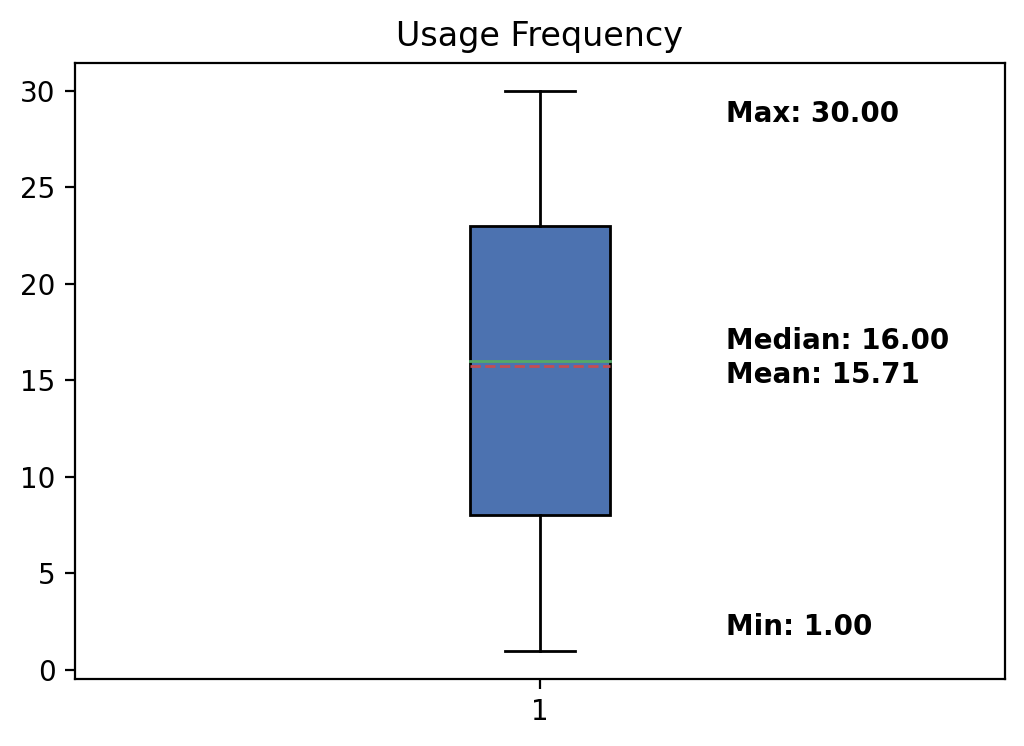

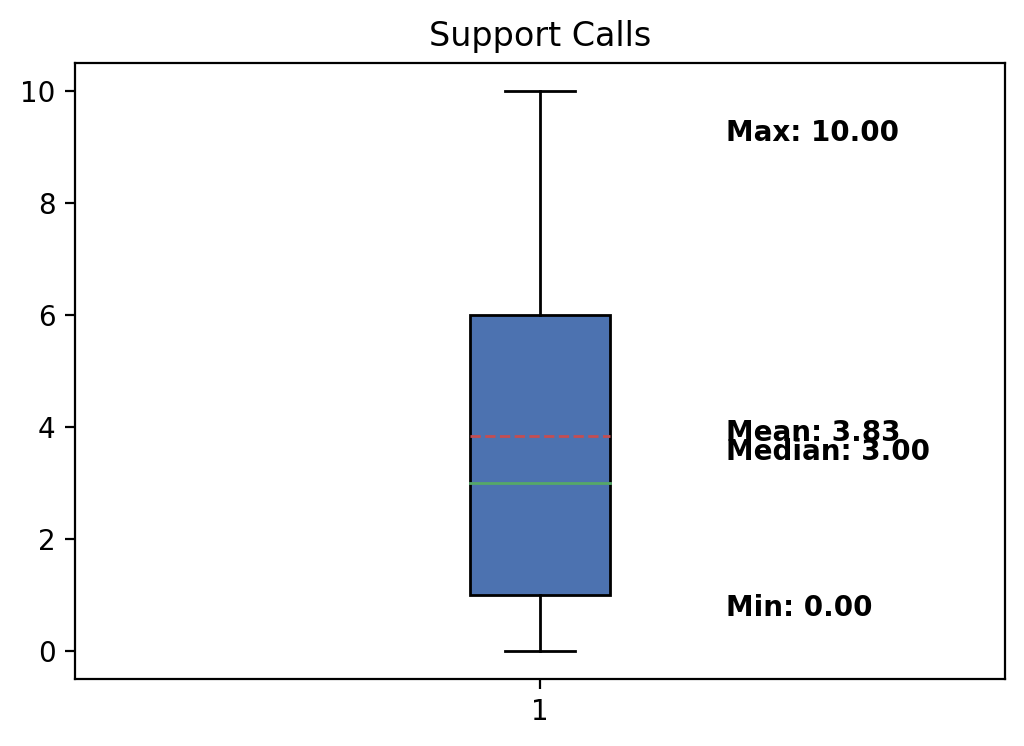

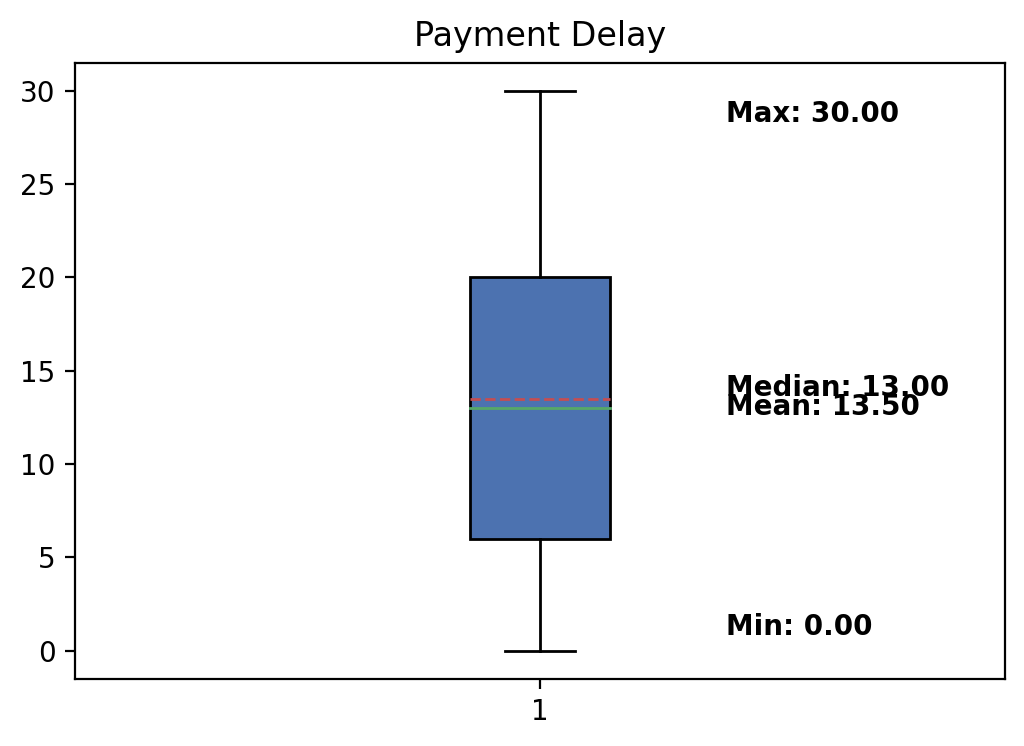

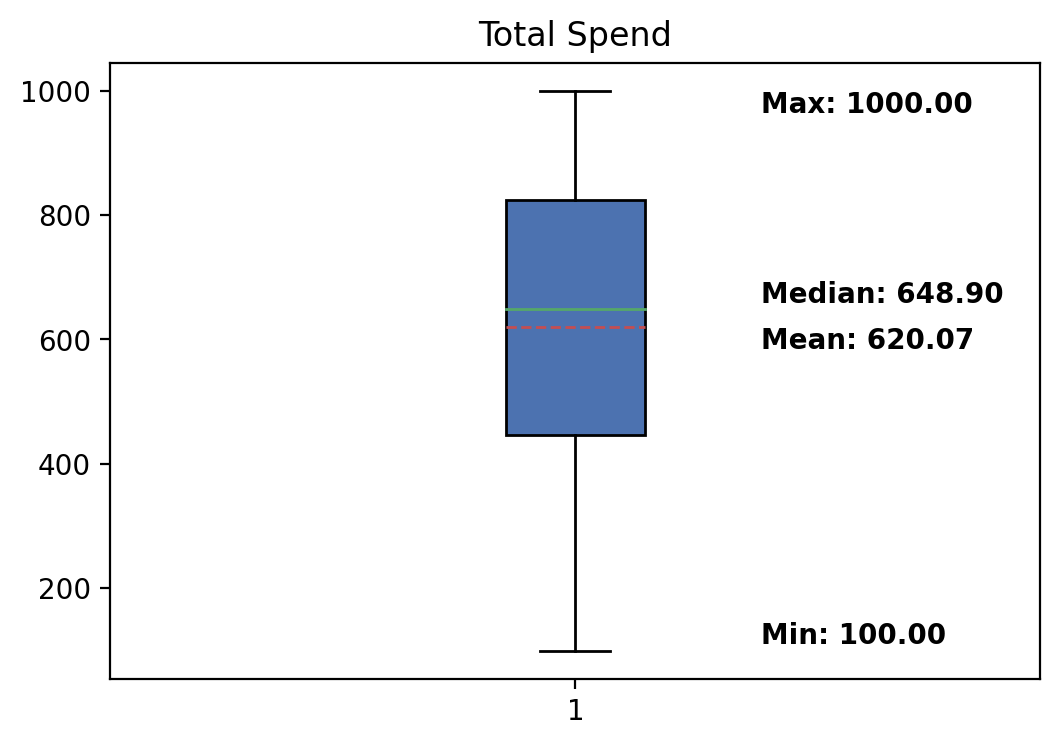

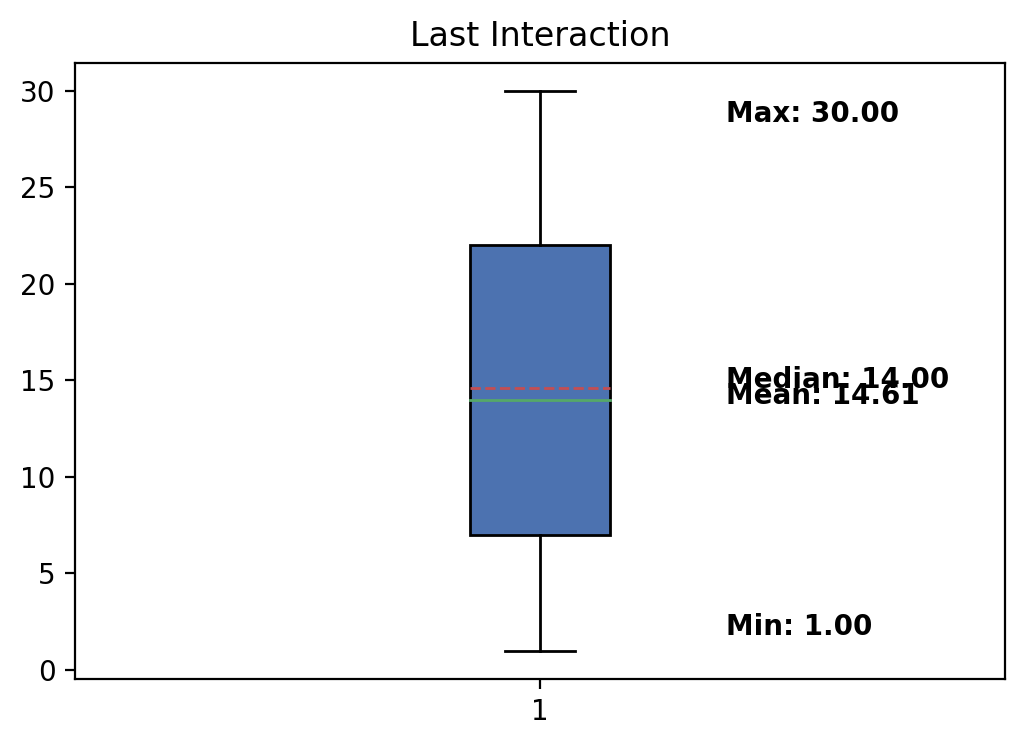

In [12]:
grouped_boxplots(df, "../reports/figures/EDA-1")

2.1.2. Grouped Histograms

c:\Users\Fausto\Telecom-Customer-Churn-Project\telecom-customer-churn-project\notebooks\../src/functions\plot_functions.py:135: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=3.0)


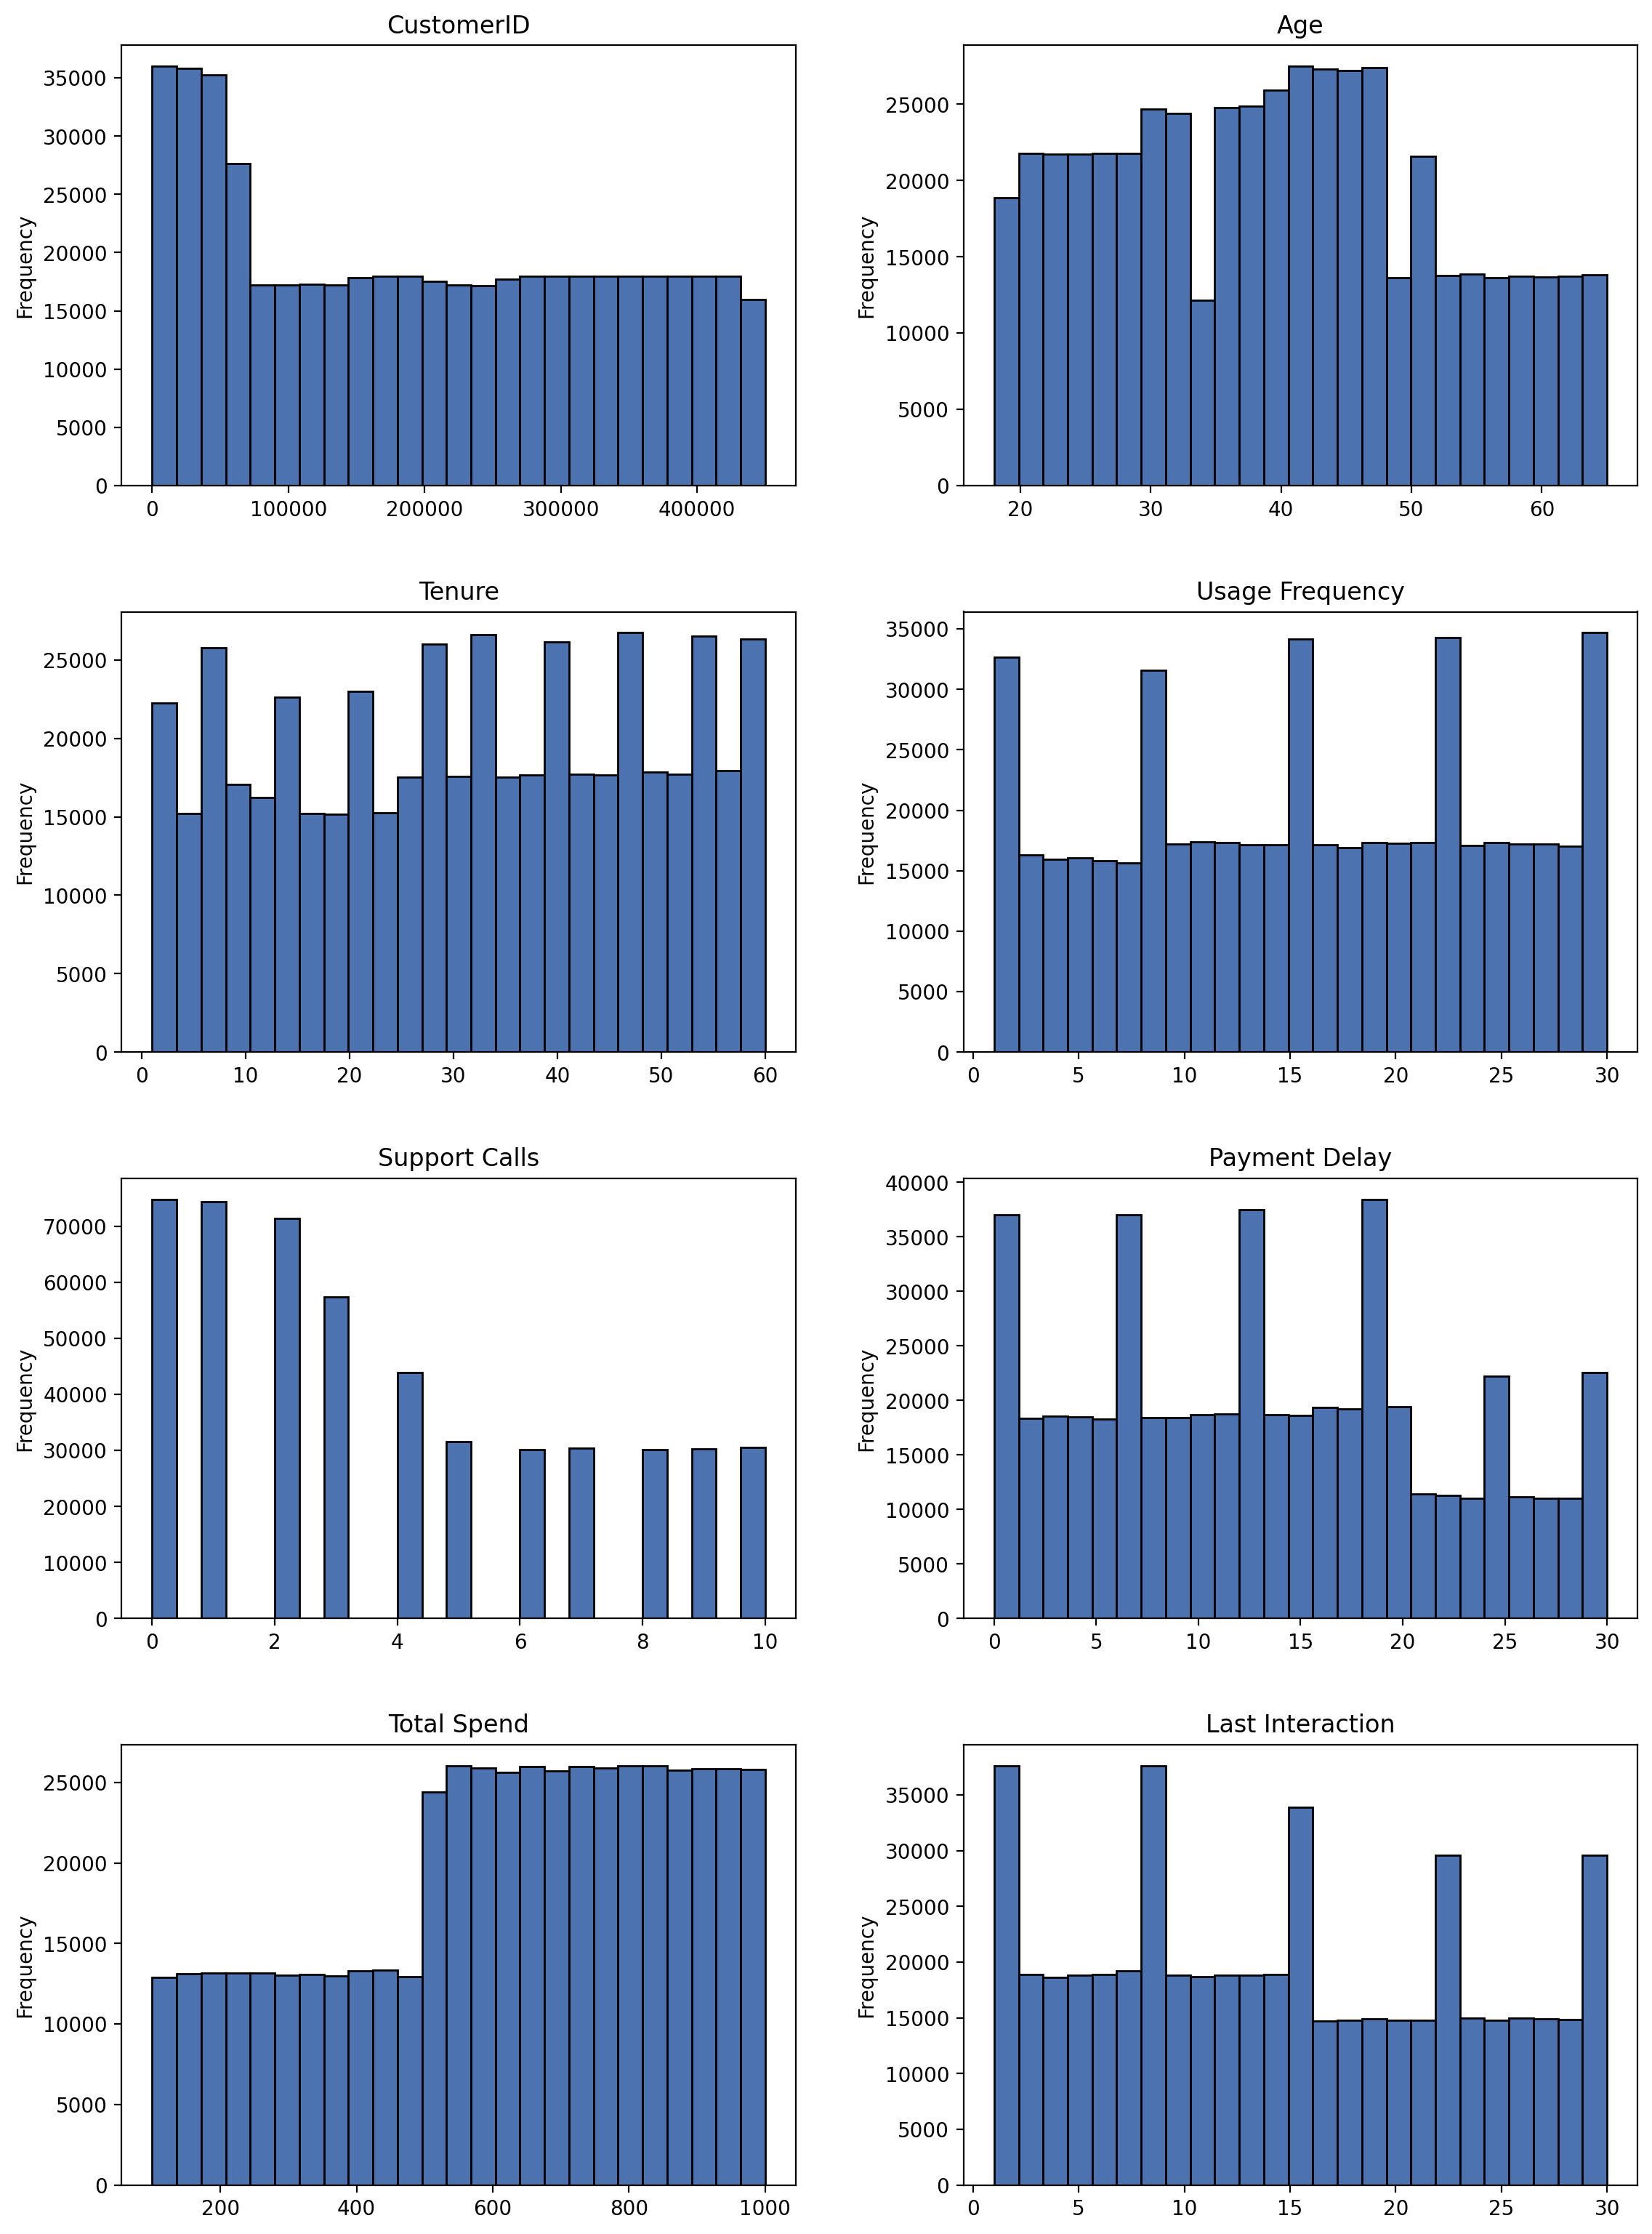

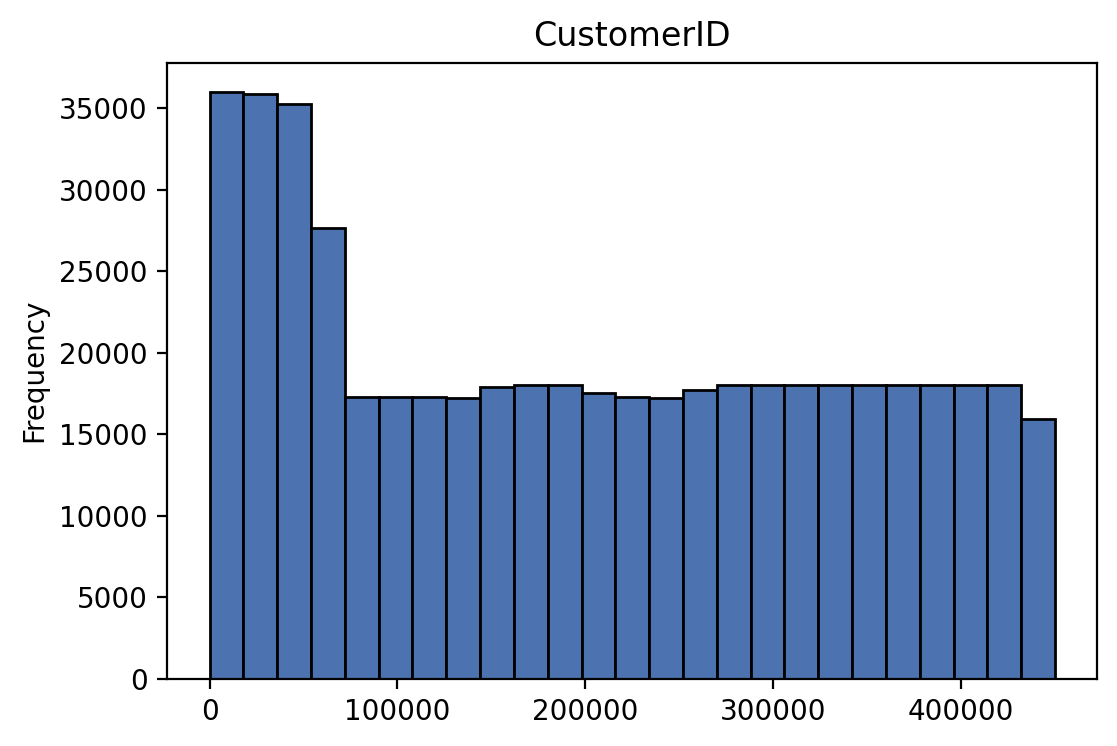

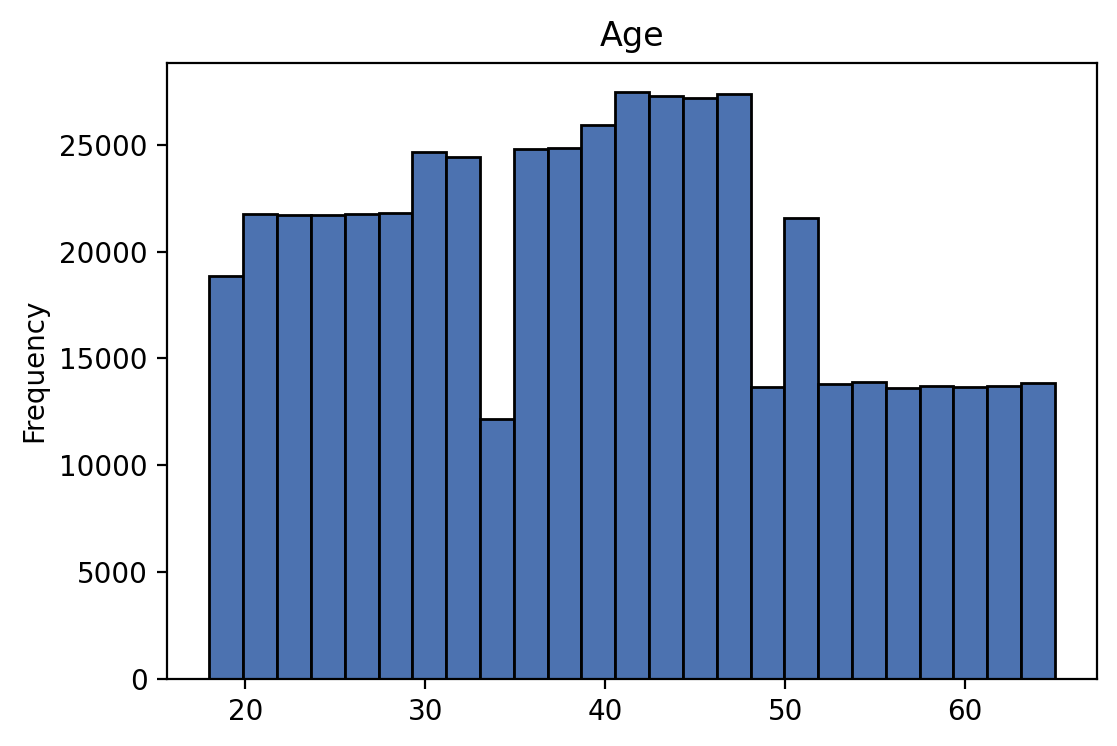

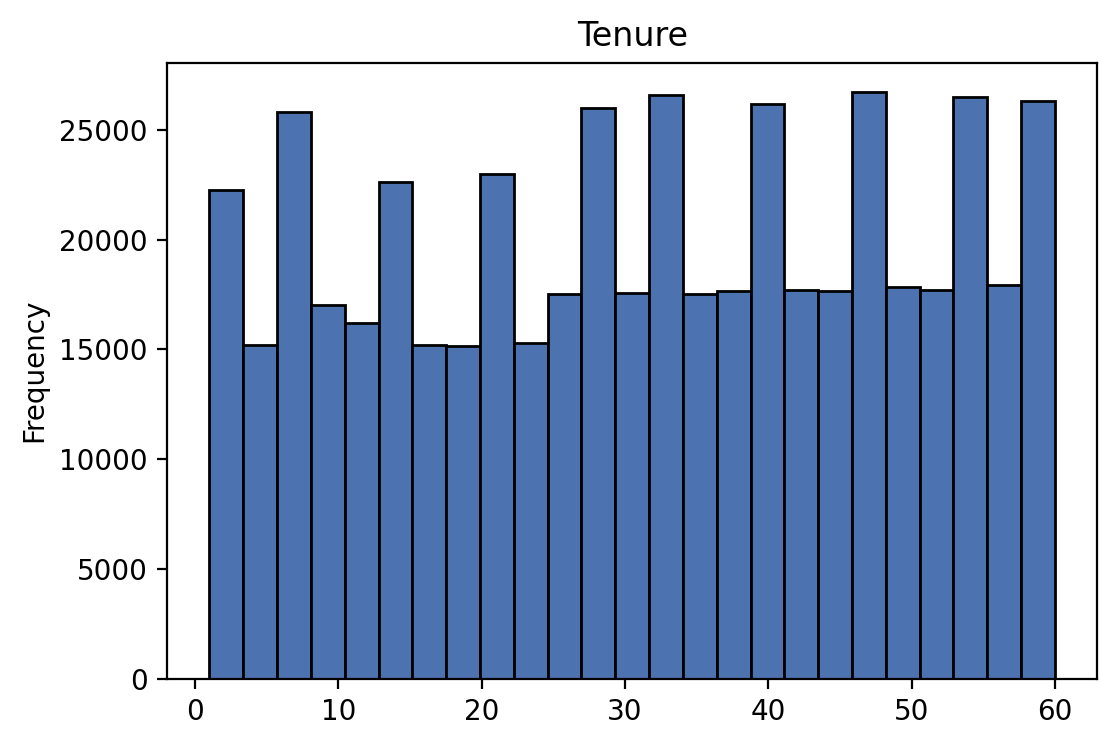

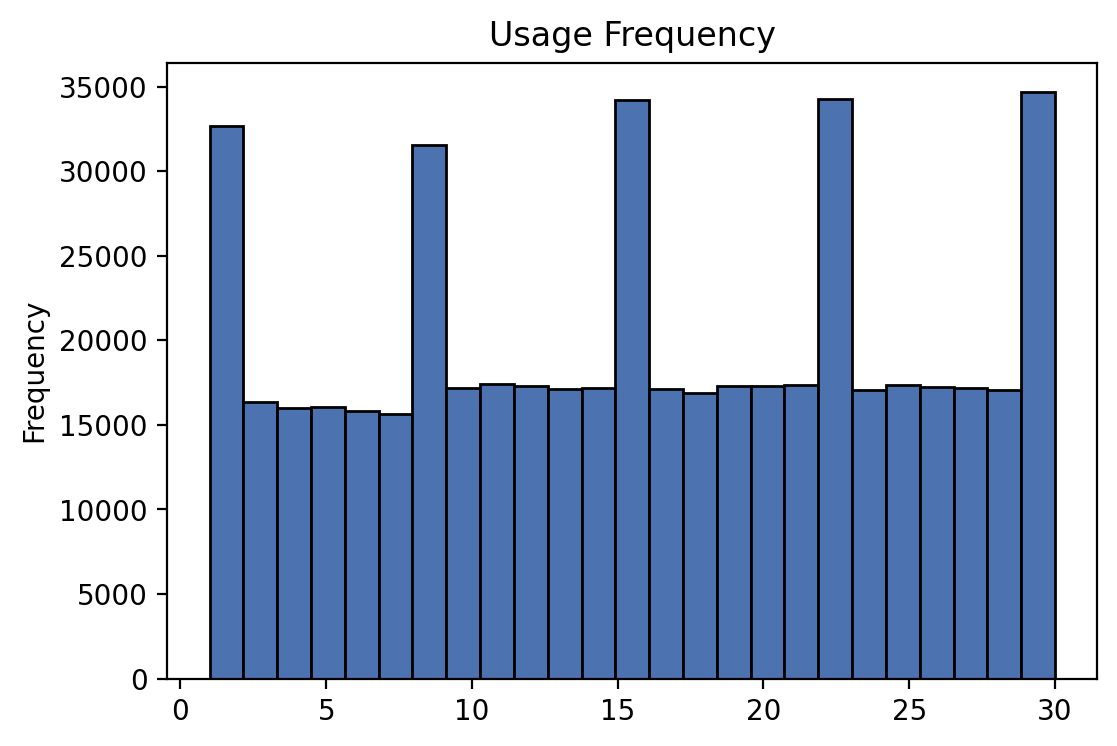

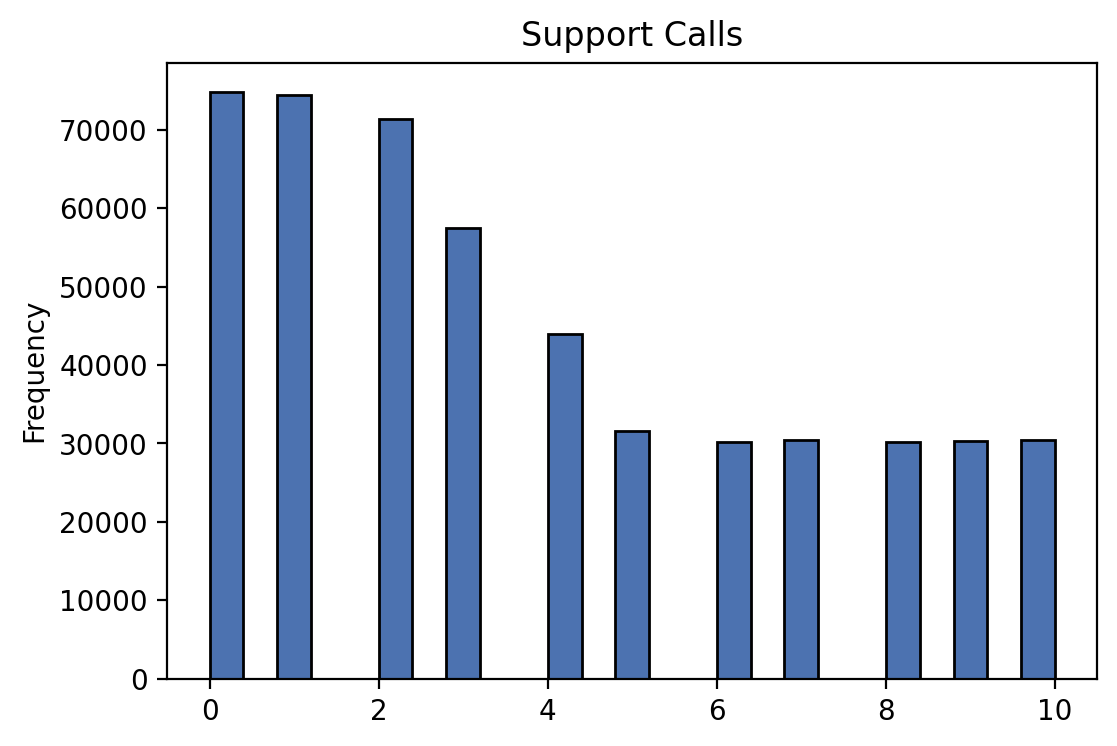

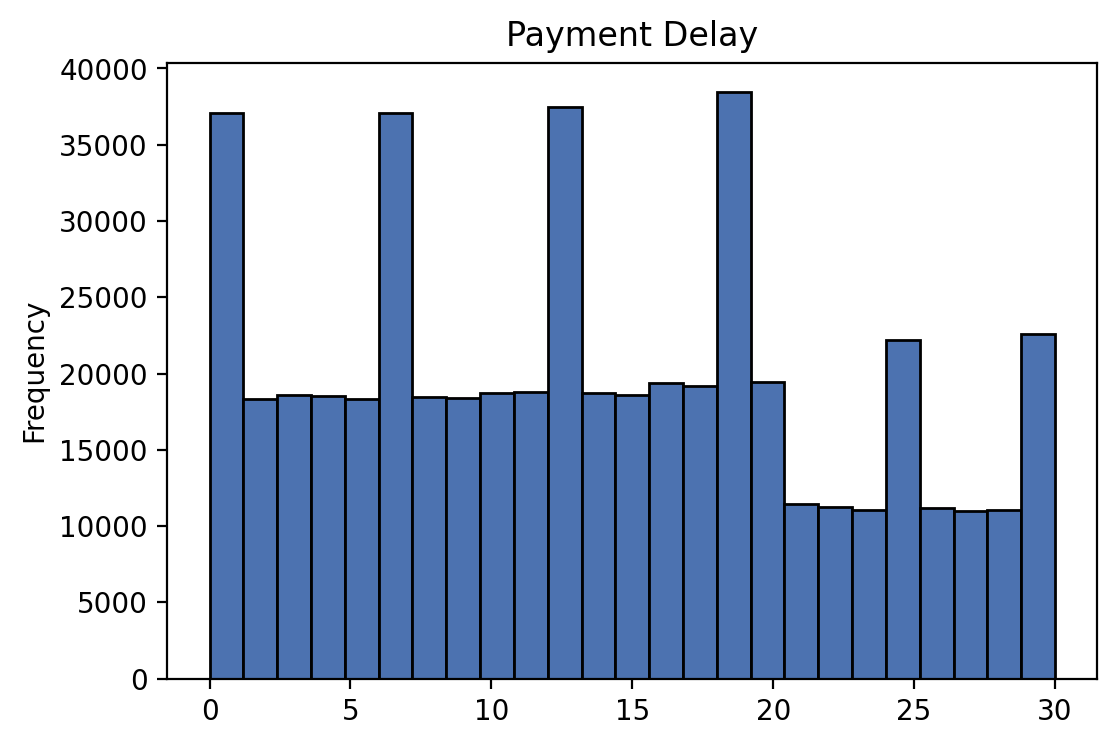

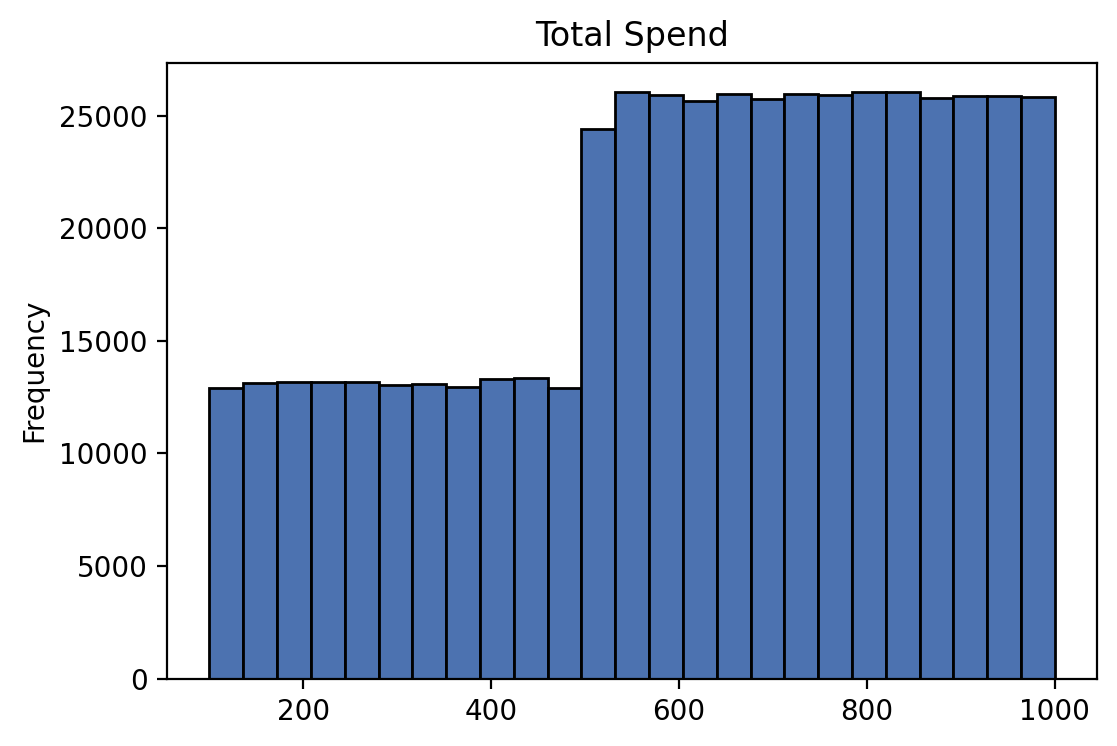

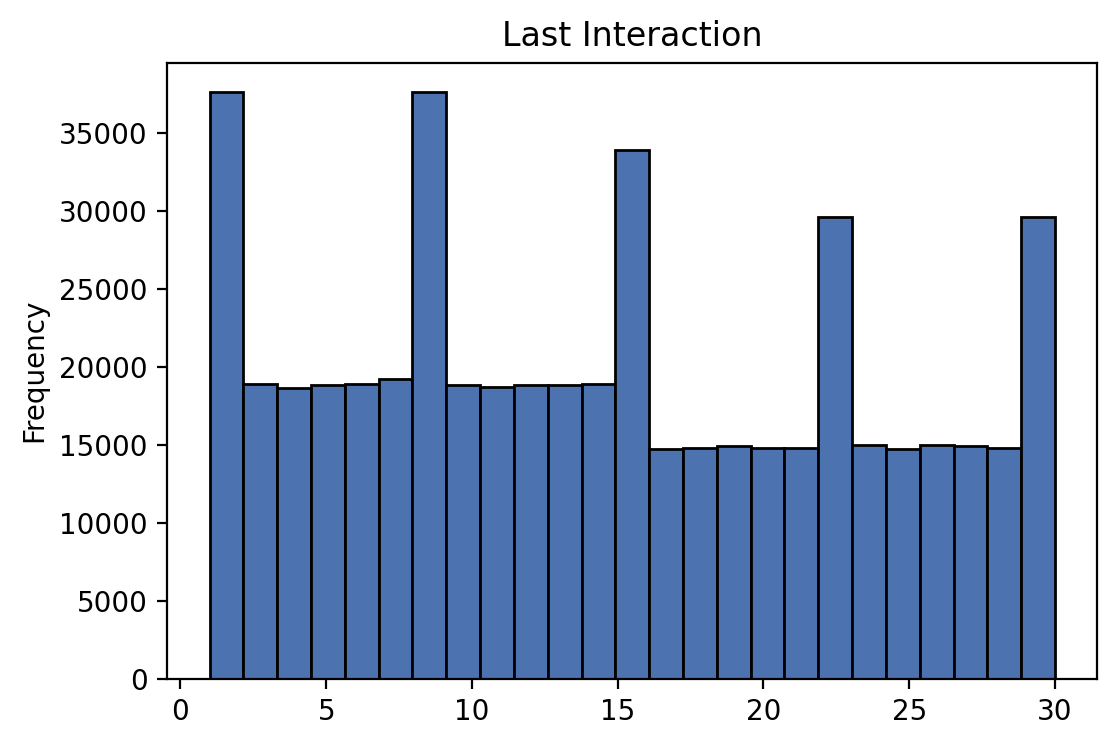

In [13]:
grouped_histograms(df, "../reports/figures/EDA-1")

2.2. Categorical variables:  

2.2.1. Stacked bar plots

[None, None, None, None]

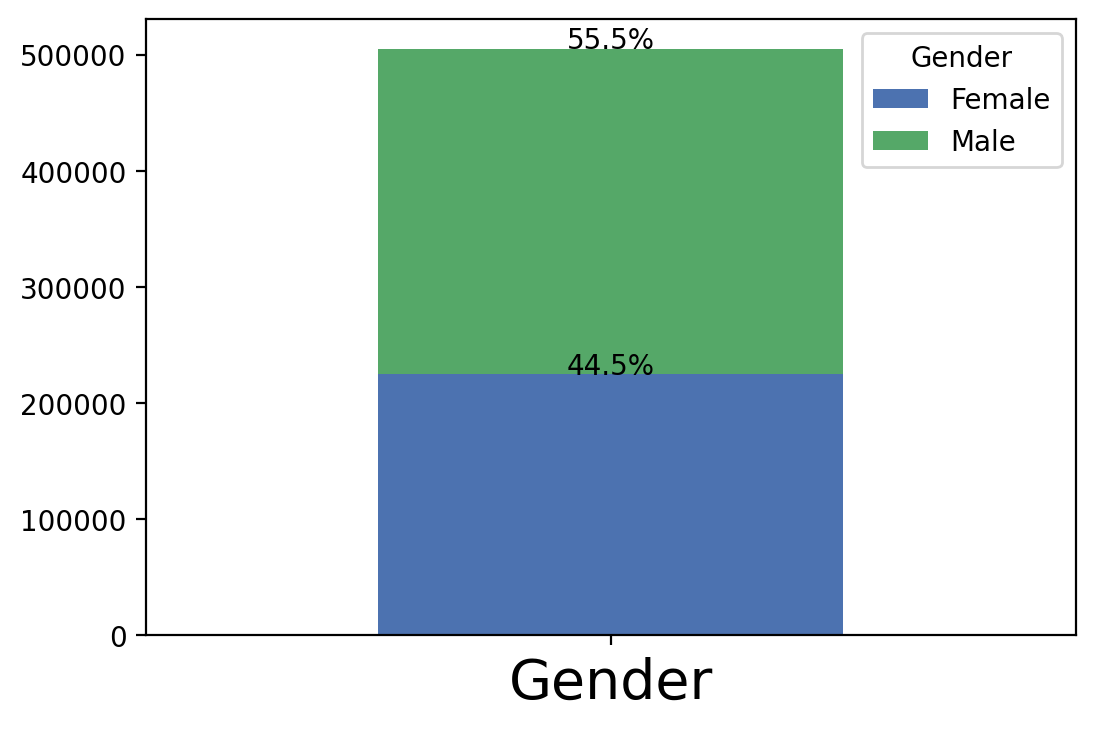

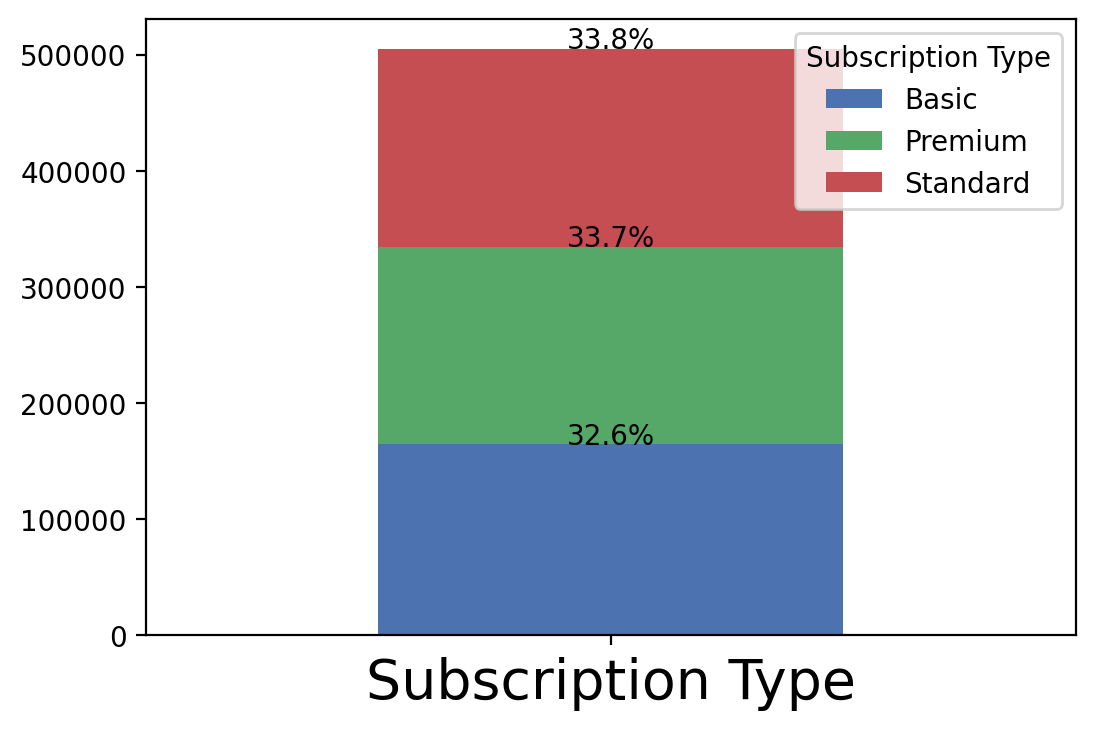

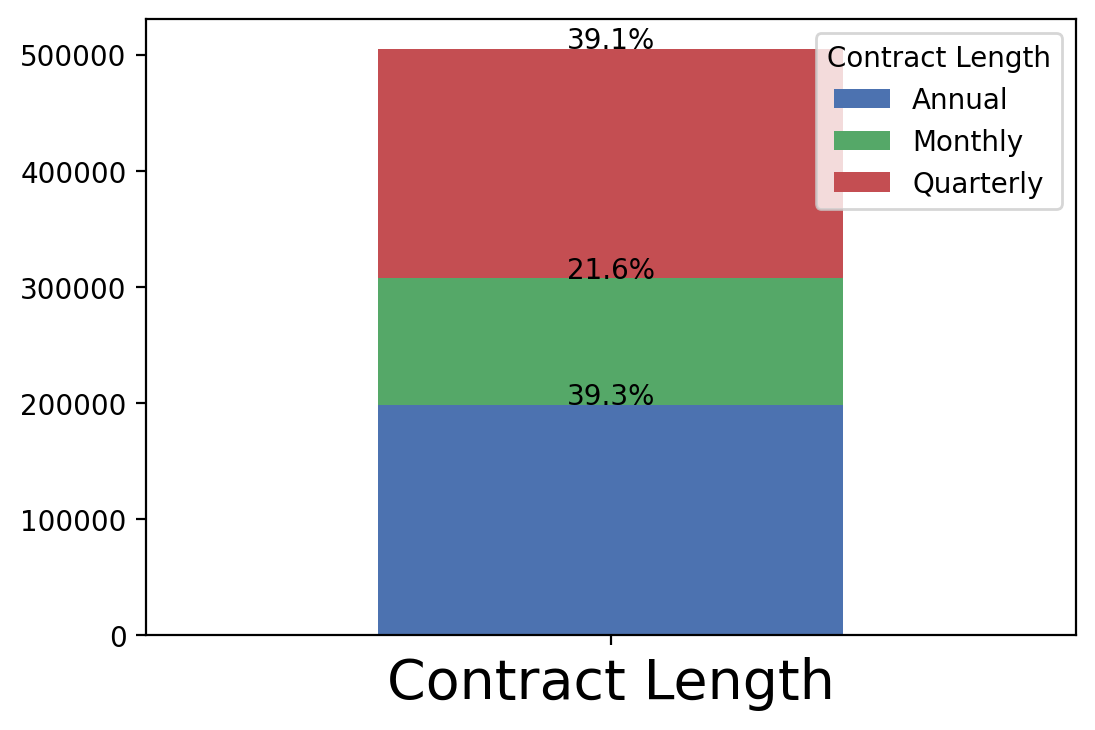

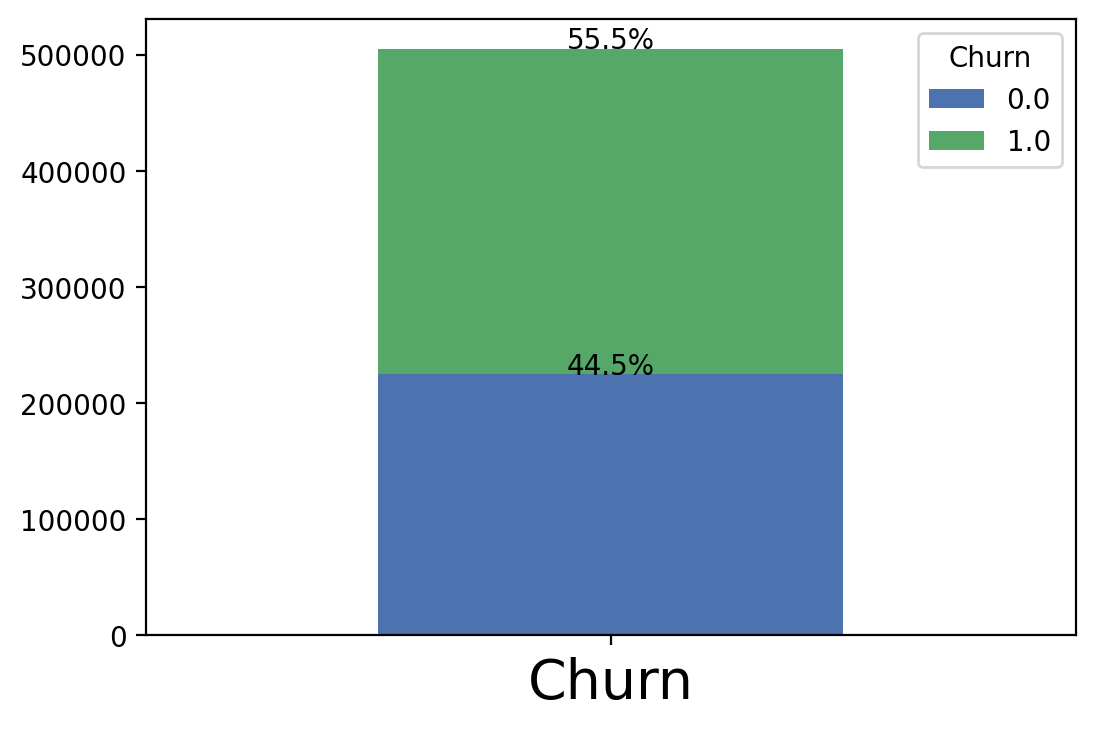

In [14]:
get_stacked_bar_plots(df, "../reports/figures/EDA-1/")

2.3. Summarizing null values in all features: \
Stacked bar plots

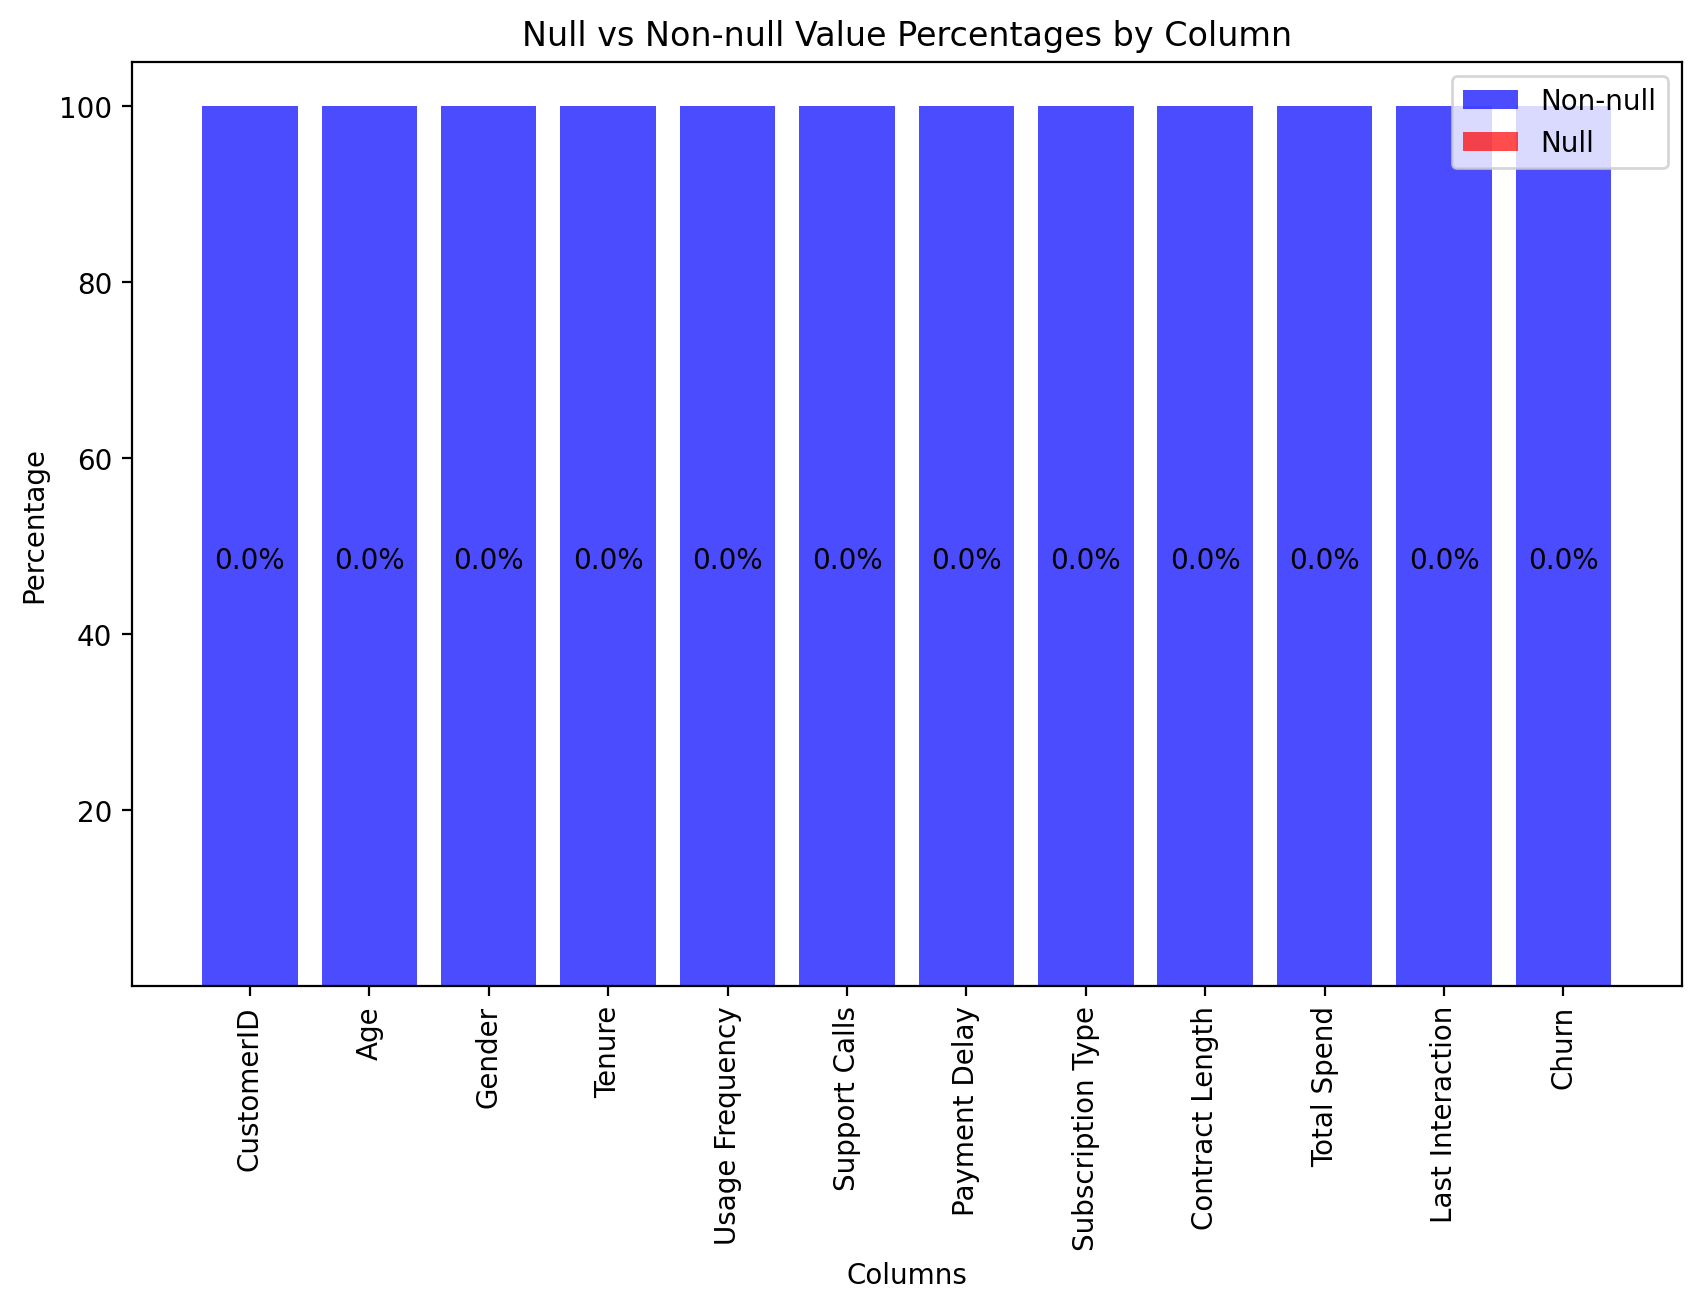

In [15]:
total_null_barplot(df, "../reports/figures/EDA-1/")

3. Data Cleaning

3.1. Remove unnecessary columns

In [3]:
df.drop(labels='CustomerID', axis=1, inplace=True)
df.to_pickle("../data/raw/customer_churn_dataset.pkl")

3.2. Null value imputation using median

In [8]:
# This funciton will impute the %0.00198 of misisng values in continuous features
# The path indicated in the function is where the imputed df is going to be saved 
impute_null_data(df, "../data/processed/imputed_df.pkl")

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
64370,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
64371,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
64372,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0
